### Identify the most influential risk factors associated with heart disease or heart attacks within the dataset titled "Heart_Disease_Health_Indicators." This research endeavor aims to construct an accurate predictive model for the early detection of individuals susceptible to heart disease. The primary motivation behind this investigation is to enhance healthcare interventions, reduce the incidence of cardiovascular ailments, and ultimately promote better cardiovascular health outcomes.

https://www.kaggle.com/datasets/bhaveshmisra/heart-disease-indicators/

**Variables:**\
HeartDiseaseorAttack: Indicates whether the individual has had a heart disease or heart attack (binary: 0 = No, 1 = Yes).\
HighBP: High blood pressure status (binary: 0 = No, 1 = Yes).\
HighChol: High cholesterol status (binary: 0 = No, 1 = Yes).\
CholCheck: Frequency of cholesterol check (categorical).\
BMI: Body Mass Index (continuous).\
Smoker: Smoking status (binary: 0 = No, 1 = Yes).\
Stroke: History of stroke (binary: 0 = No, 1 = Yes).\
Diabetes: Diabetes status (binary: 0 = No, 1 = Yes).\
PhysActivity: Level of physical activity (categorical).\
Fruits: Frequency of fruit consumption (categorical).\
Veggies: Frequency of vegetable consumption (categorical).\
HvyAlcoholConsump: Heavy alcohol consumption status (binary: 0 = No, 1 = Yes).\
AnyHealthcare: Access to any healthcare (binary: 0 = No, 1 = Yes).\
NoDocbcCost: No doctor because of cost (binary: 0 = No, 1 = Yes).\
GenHlth: General health assessment (categorical).\
MentHlth: Mental health assessment (categorical).\
PhysHlth: Physical health assessment (categorical).\
DiffWalk: Difficulty walking status (binary: 0 = No, 1 = Yes).\
Sex: Gender of the individual (binary: 0 = Female, 1 = Male).\
Age: Age of the individual (continuous).\
Education: Educational level (categorical).\
Income: Income level (categorical).

### Import Necessary Libraries

In [1]:
# Import important libraries for this project #
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Load in and visualize data

In [2]:
df = pd.read_csv("heart_disease_health_indicators.csv") #Load in the data

print(df.shape) #Print the shape to confirm at least 500 data entries

df.head() #Visualize first 5 rows of dataset

(253661, 22)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


### Clean the Data (Check for nulls/Check data types)

In [3]:
df.isnull().sum() #Checking for null values in my dataframe

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [4]:
data_types = df.dtypes #Check data types of each column in the DataFrame

print(data_types) #Display the data types

HeartDiseaseorAttack    int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
Diabetes                int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object


## Perform Brief Exploratory Data Analysis

### Gain an understanding of the variables and what we are working with.

In [5]:
# Summary Statistics for Numerical Features
numerical_features = df.select_dtypes(include=['int64'])
print(numerical_features.describe())

       HeartDiseaseorAttack         HighBP       HighChol      CholCheck  \
count         253661.000000  253661.000000  253661.000000  253661.000000   
mean               0.094173       0.428990       0.424113       0.962667   
std                0.292070       0.494933       0.494209       0.189578   
min                0.000000       0.000000       0.000000       0.000000   
25%                0.000000       0.000000       0.000000       1.000000   
50%                0.000000       0.000000       0.000000       1.000000   
75%                0.000000       1.000000       1.000000       1.000000   
max                1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke       Diabetes  \
count  253661.000000  253661.000000  253661.000000  253661.000000   
mean       28.382475       0.443186       0.040570       0.296904   
std         6.608638       0.496763       0.197292       0.698147   
min        12.000000       0.000000    

### Create a box plot for the numerical features (BMI & Age)

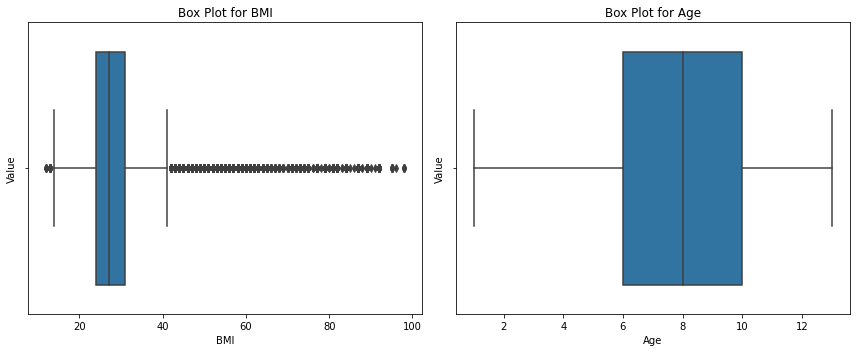

In [6]:
# Display box plots for Numerical Features
plt.figure(figsize=(12, 5))

# Box plot for BMI
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='BMI')
plt.title('Box Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Value')

# Box plot for Age
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Age')
plt.title('Box Plot for Age')
plt.xlabel('Age')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

### We are focusing on BMI and Age as they seem to have outliers affecting the data

In [7]:
# Calculate and print statistics for BMI and Age
print("Statistics for BMI:")
print(df['BMI'].describe())

print("\nStatistics for Age:")
print(df['Age'].describe())

Statistics for BMI:
count    253661.000000
mean         28.382475
std           6.608638
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

Statistics for Age:
count    253661.000000
mean          8.032197
std           3.054203
min           1.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: Age, dtype: float64


In [8]:
from scipy.stats.mstats import winsorize

# Define the lower and upper percentiles
lower_age = df['Age'].quantile(0.05)
upper_age = df['Age'].quantile(0.95)

lower_bmi = df['BMI'].quantile(0.05)
upper_bmi = df['BMI'].quantile(0.95)

# Apply Winsorization with less aggressive thresholds
df['Age'] = df['Age'].clip(lower_age, upper_age)
df['BMI'] = df['BMI'].clip(lower_bmi, upper_bmi)

### Once again gaining an understanding of BMI & Age after dealing with outliers

In [9]:
# Calculate and print statistics for BMI and Age
print("Statistics for BMI:")
print(df['BMI'].describe())

print("\nStatistics for Age:")
print(df['Age'].describe())

Statistics for BMI:
count    253661.000000
mean         28.091508
std           5.329047
min          20.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          40.000000
Name: BMI, dtype: float64

Statistics for Age:
count    253661.000000
mean          8.054667
std           3.005675
min           2.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: Age, dtype: float64


### Create a New Box Plot of All Numerical Features (BMI & Age) After Outliers Have Been Dealt With

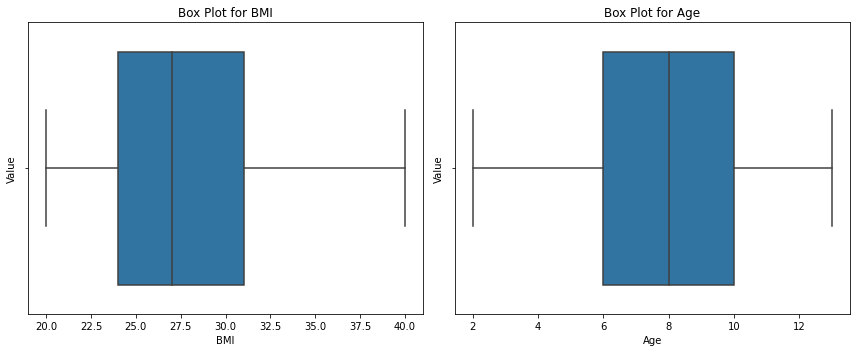

In [10]:
# Display box plots for Numerical Features
plt.figure(figsize=(12, 5))

# Box plot for BMI
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='BMI')
plt.title('Box Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Value')

# Box plot for Age
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Age')
plt.title('Box Plot for Age')
plt.xlabel('Age')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

### Create a Correlation Matrix (helps with understanding variables and their relationships between each other)

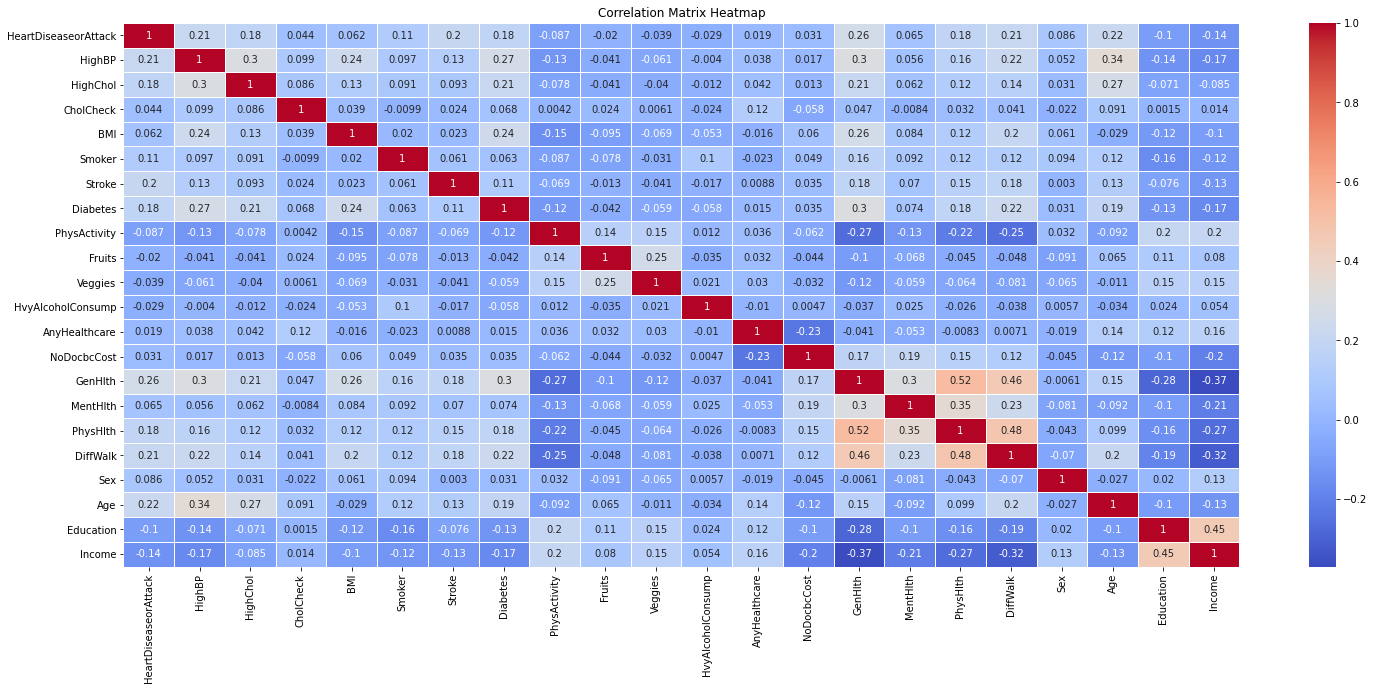

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Split Data into Training/Testing splits
### Feature Engineering as Appropriate

In [12]:
# Encode categorical features using one-hot encoding
categorical_columns = ["CholCheck", "PhysActivity", "Fruits", "Veggies", "GenHlth", "MentHlth", "PhysHlth", "Education", "Income"]
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [13]:
print(df.dtypes)

HeartDiseaseorAttack    int64
HighBP                  int64
HighChol                int64
BMI                     int64
Smoker                  int64
                        ...  
Income_4                uint8
Income_5                uint8
Income_6                uint8
Income_7                uint8
Income_8                uint8
Length: 93, dtype: object


In [14]:
from sklearn.model_selection import train_test_split

# Define Features/Predictors (X) and Target Variable (y)
X = df.drop('HeartDiseaseorAttack', axis=1)  #Features
y = df['HeartDiseaseorAttack']  #Target variable

# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Shapes of the sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (177562, 92) (177562,)
Test set shape: (76099, 92) (76099,)


### Rescale Data as Appropriate

In [15]:
#Initialize Scaler
scaler = StandardScaler()

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train & Hyperparameter Tune Base of Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression() #Define Base Logistic Regression model

# Create a hyperparameter grid to search
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [1000],
    'solver': ['lbfgs'],
    'class_weight': ['balanced'], # Fix class imbalance
    'random_state': [42] # Set Random_state for reproducability
}

# Create a GridSearchCV object with the logistic regression model and parameter grid
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit the GridSearchCV object to the entire training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Get the best cross-validation score from the grid search
best_score = grid_search.best_score_

# Print the best hyperparameters and cross-validation score
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}
Best Cross-Validation Score: 0.37669061886634


### Initialize Second Logistic Regression Model with the Best Hyperparameters From Tuning the Base

In [17]:
# Use the best hyperparameters to train the final model on the entire training set
best_log_reg = LogisticRegression(**best_params)
best_log_reg.fit(X_train_scaled, y_train)

# Evaluate the final model on the train set
train_accuracy = best_log_reg.score(X_train_scaled, y_train)
print("Train Accuracy with Best Model:", train_accuracy)

# Evaluate the final model on the test set
test_accuracy = best_log_reg.score(X_test_scaled, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

Train Accuracy with Best Model: 0.7528919476014012
Test Accuracy with Best Model: 0.750969132314485


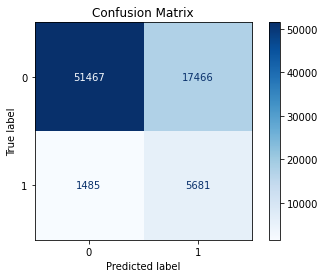

Best Hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}
Accuracy: 0.750969132314485
Precision: 0.24543137339612045
Recall: 0.7927714205972649
F1-Score: 0.37482268333718205


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix

# Evaluate model performance
y_pred = best_log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object and plot it
disp = ConfusionMatrixDisplay(confusion_matrix = confusion)
disp.plot(cmap='Blues', values_format='d')

# Show the confusion matrix
plt.title('Confusion Matrix')
plt.show()

# Print Evaluation Metrics on the Test Set
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

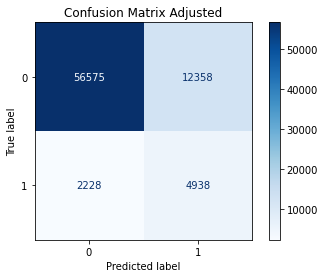

Accuracy with Adjusted Threshold: 0.8083286245548562
Precision with Adjusted Threshold: 0.28549953746530987
Recall with Adjusted Threshold: 0.6890873569634385
F1-Score with Adjusted Threshold: 0.4037282315428011


In [19]:
# Predict probabilities for the positive class
y_prob = best_log_reg.predict_proba(X_test_scaled)[:, 1]

# Adjust the threshold (By default it is 0.5)
threshold = 0.6

# Create binary predictions based on the adjusted threshold
y_pred_adjusted = (y_prob > threshold).astype(int)

# Evaluate the model with the adjusted threshold
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)
f1_adjusted = f1_score(y_test, y_pred_adjusted)
confusion_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)

# Create a ConfusionMatrixDisplay object and plot it
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_adjusted)
disp.plot(cmap='Blues', values_format='d')

# Show the confusion matrix
plt.title('Confusion Matrix Adjusted')
plt.show()

print("Accuracy with Adjusted Threshold:", accuracy_adjusted)
print("Precision with Adjusted Threshold:", precision_adjusted)
print("Recall with Adjusted Threshold:", recall_adjusted)
print("F1-Score with Adjusted Threshold:", f1_adjusted)

### Method One for Finding Indicators of Heart Disease:

In [20]:
# Get the coefficients from the trained model
coefficients = best_log_reg.coef_[0]

# Exponentiate the coefficients
exp_coefficients = np.exp(coefficients)

# Create a dictionary to map feature names to their corresponding exponentiated coefficients
feature_coeff_dict = {}
for i, feature_name in enumerate(X.columns):
    feature_coeff_dict[feature_name] = exp_coefficients[i]

# Sort the feature_coeff_dict by exponentiated coefficients in descending order
sorted_feature_coeff = dict(sorted(feature_coeff_dict.items(), key=lambda x: x[1], reverse=True))

# Print the sorted coefficients
for feature, coeff in sorted_feature_coeff.items():
    print(f"{feature}: {coeff}")

Age: 2.3387168956825266
GenHlth_4: 1.6032218807646115
GenHlth_3: 1.5203367311857434
Sex: 1.5141141066787873
GenHlth_5: 1.471530937731754
HighChol: 1.3764406875230282
HighBP: 1.3130001671608504
Stroke: 1.2471830116243705
Smoker: 1.202283476909801
GenHlth_2: 1.1912125092817079
DiffWalk: 1.122315015508276
CholCheck_1: 1.1192671711012088
Diabetes: 1.112394533157828
NoDocbcCost: 1.0773182853154217
PhysHlth_10: 1.0384879980224728
PhysHlth_4: 1.029752294734824
PhysHlth_20: 1.0281137283024562
PhysHlth_5: 1.0278331661111622
MentHlth_30: 1.0275242056212484
Education_5: 1.0271542725915164
PhysHlth_30: 1.024499143574764
PhysHlth_3: 1.023945169484141
PhysHlth_2: 1.0238681805119716
PhysHlth_7: 1.0224218451656923
PhysHlth_15: 1.0223516656321456
PhysHlth_6: 1.02056037773803
MentHlth_16: 1.0189555797718124
PhysActivity_1: 1.018813874645643
MentHlth_24: 1.0177884813382967
MentHlth_21: 1.016495740316908
MentHlth_7: 1.016381507057386
PhysHlth_28: 1.016304371054945
MentHlth_14: 1.0162498564788869
Veggies_1

### Initialize Third Logistic Regression Model
### Method Two for Finding Significant Indicators of Heart Disease:

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE

N = 11  # Replace with the desired number of top features
    
# Select the top N features based on ANOVA F-statistic
k_best = SelectKBest(score_func=f_classif, k=N)
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

# Initialize the logistic regression model with the best hyperparameters
best_log_reg = LogisticRegression(**best_params)

# Initialize RFE with the logistic regression model and the desired number of features to select
n_features_to_select = 11  # Adjust this number as needed
rfe = RFE(estimator=best_log_reg, n_features_to_select=n_features_to_select)

# Fit RFE to the training data
rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

# Transform the training and test data to include only the selected features
X_train_selected = rfe.transform(X_train_scaled)
X_test_selected = rfe.transform(X_test_scaled)

# Train a new logistic regression model with the selected features
best_log_reg.fit(X_train_selected, y_train)

# Evaluate the model on the test set with selected features
test_accuracy_selected = best_log_reg.score(X_test_selected, y_test)
print("Test Accuracy with Selected Features:", test_accuracy_selected)


Selected Features:
Index(['HighBP', 'HighChol', 'Smoker', 'Stroke', 'DiffWalk', 'Sex', 'Age',
       'GenHlth_2', 'GenHlth_3', 'GenHlth_4', 'GenHlth_5'],
      dtype='object')
Test Accuracy with Selected Features: 0.7506537536629916


### Initialize Fourth Logistic Regression Model
### Method Three for Finding Significant Indicators of Heart Disease:

In [22]:
# Initialize the logistic regression model
feature_selection_log_reg = LogisticRegression(**best_params)

# Fit the model to the training data with selected features
feature_selection_log_reg.fit(X_train_selected, y_train)

# Evaluate the model on the test/train set with selected features
train_accuracy_selected = feature_selection_log_reg.score(X_train_selected, y_train)
test_accuracy_selected = feature_selection_log_reg.score(X_test_selected, y_test)
print("Train Accuracy with Selected Features:", train_accuracy_selected)
print("Test Accuracy with Selected Features:", test_accuracy_selected)

# Get the coefficients (importances) of the selected features
feature_importances = feature_selection_log_reg.coef_[0]

# Create a dictionary to map feature indices to their corresponding coefficients
feature_importance_dict = {}
selected_feature_indices = np.where(k_best.get_support())[0]  # Get the indices of selected features
for i, feature_index in enumerate(selected_feature_indices):
    feature_importance_dict[f"Feature_{feature_index}"] = feature_importances[i]

# Sort the feature_importance_dict by coefficients in descending order
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Print the sorted feature importances
for feature, importance in sorted_feature_importance.items():
    print(f"{feature}, Importance: {importance}")

Train Accuracy with Selected Features: 0.7511686058954056
Test Accuracy with Selected Features: 0.7506537536629916
Feature_11, Importance: 0.8302559957328615
Feature_19, Importance: 0.5539159874496928
Feature_18, Importance: 0.4739259852057341
Feature_79, Importance: 0.45440490101020853
Feature_9, Importance: 0.3831495083508879
Feature_1, Importance: 0.3321130324542642
Feature_0, Importance: 0.3014289128852006
Feature_4, Importance: 0.23077912885715499
Feature_16, Importance: 0.19268711182750645
Feature_3, Importance: 0.18746846620112192
Feature_5, Importance: 0.1628382646838065


In [23]:
# Get the column names out of the df
feature_names = X.columns.tolist()

# Create a mapping dictionary for feature indices to feature names
feature_index_to_name = {f"Feature_{i}": feature_names[i] for i in selected_feature_indices}

# Sort the feature_importance_dict by importances in descending order
sorted_feature_importance = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)}

# Print the sorted feature importances with their names
for feature_index, importance in sorted_feature_importance.items():
    feature_name = feature_index_to_name.get(feature_index, "Unknown Feature")
    print(f"{feature_name}, Importance: {importance}")

Age, Importance: 0.8302559957328615
GenHlth_5, Importance: 0.5539159874496928
GenHlth_4, Importance: 0.4739259852057341
PhysHlth_30, Importance: 0.45440490101020853
DiffWalk, Importance: 0.3831495083508879
HighChol, Importance: 0.3321130324542642
HighBP, Importance: 0.3014289128852006
Stroke, Importance: 0.23077912885715499
GenHlth_2, Importance: 0.19268711182750645
Smoker, Importance: 0.18746846620112192
Diabetes, Importance: 0.1628382646838065


### Create a Barplot for Method Three (Feature Importances)

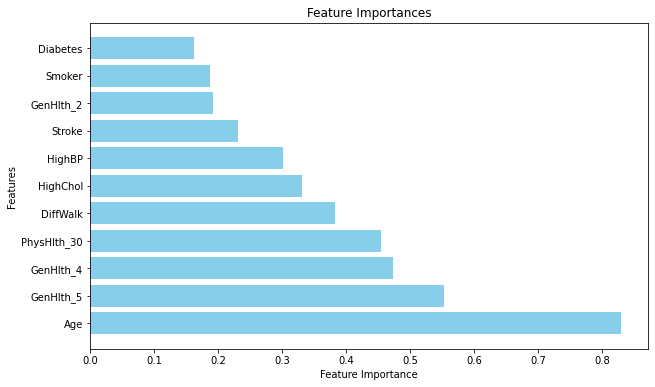

In [24]:
# Feature Names and Importances
feature_names = ["Age", "GenHlth_5", "GenHlth_4", "PhysHlth_30", "DiffWalk", "HighChol", "HighBP", "Stroke", "GenHlth_2", "Smoker", "Diabetes"]
importances = [0.8302559957328615, 0.5539159874496928, 0.4739259852057341, 0.45440490101020853, 0.3831495083508879, 0.3321130324542642, 0.3014289128852006, 0.23077912885715499, 0.19268711182750645, 0.18746846620112192, 0.1628382646838065]
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')

# Display the plot
plt.show()

### Train & Hyperparameter Tune Base of Random Forest Classifier Model:
##### Starting off by creating a test/train split
##### Then create a param_grid for hyperparameter tuning
##### Initialize the base model
##### Evaluate to view metrics and see how to move forward

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Replace X_encoded and y with your encoded features and target variable
X_encoded = df[["Age", "GenHlth_4", "GenHlth_3", "Sex", "GenHlth_5", "HighChol", "HighBP", "Stroke", "Smoker", "GenHlth_2", "DiffWalk"]]

y = df['HeartDiseaseorAttack']

# Subsample the data
subsample_fraction = 0.1
X_subsample, _, y_subsample, _ = train_test_split(X_encoded, y, test_size=1 - subsample_fraction, random_state=42)

# Split the subsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subsample, y_subsample, test_size=0.3, random_state=42)

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100], #Also had 200 and 300 as choices but deemed n_estimators at 100 to provide the best results
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'max_features': [9, 10, 11], I ran this on the entire df originally to see how many features and checked which ones it thought
    # were best and based on all of the previous feature selection that has been done I kept the best number of features and removed
    # the irrelivent features putting in highly coorelated features instead that were overlooked
    'random_state': [42]
}

# Initialize the Random Forest model
rf_classifier_ht = RandomForestClassifier(random_state=42)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(rf_classifier_ht, param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Initialize a new model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**best_params)

# Fit the model to the training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(confusion)


### WITH ORIGINAL X_ENCODED ###
#X_encoded = df[['GenHlth_3', 'GenHlth_5', 'Smoker', 'Age', 'HighChol', 'GenHlth_4', 'HighBP', 'Sex', 'Stroke', 'DiffWalk', 'Diabetes']]

#Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}
#Accuracy: 0.8918528252299606
#Precision: 0.3501683501683502
#Recall: 0.14168937329700274
#F1-Score: 0.2017458777885548
#Confusion Matrix:
#[[6683  193]
# [ 630  104]]
    
### WITH WHOLE DATAFRAME ###
#Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}
#Accuracy: 0.8918528252299606
#Precision: 0.3501683501683502
#Recall: 0.14168937329700274
#F1-Score: 0.2017458777885548
#Confusion Matrix:
#[[6683  193]
# [ 630  104]]

### WITH NEW X_ENCODED ###
#Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
#Accuracy: 0.8939553219448094
#Precision: 0.3622641509433962
#Recall: 0.1307901907356948
#F1-Score: 0.19219219219219216
#Confusion Matrix:
#[[6707  169]
# [ 638   96]]

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
Accuracy: 0.8977660972404731
Precision: 0.41338582677165353
Recall: 0.14305177111716622
F1-Score: 0.21255060728744937
Confusion Matrix:
[[6727  149]
 [ 629  105]]


### Initialized Second Random Forest Classifier Model:
##### Starting off by creating a test/train split
##### Use the best_params that we aquired from hyperparameter tuning
##### Evaluate metrics for further improvement

In [26]:
# Replace X_encoded and y with your encoded features and target variable
X_encoded = df[["Age", "GenHlth_4", "GenHlth_3", "Sex", "GenHlth_5", "HighChol", "HighBP", "Stroke", "Smoker", "GenHlth_2", "DiffWalk"]]
y = df['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(**best_params)  # You can adjust hyperparameters

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) #Calcualte accuracy
confusion = confusion_matrix(y_test, y_pred) #Create a confusion matrix
precision = precision_score(y_test, y_pred) #Calculate precision
recall = recall_score(y_test, y_pred) #Calculate recall
f1 = f1_score(y_test, y_pred) #Calculate F1-score

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.9082248124154062
Precision: 0.5062730627306273
Recall: 0.09798600199971433
F1-Score: 0.16419339396840596
Confusion Matrix:
[[68429   669]
 [ 6315   686]]


#### Create a ROC Curve
##### Checks for performance of the model by using roc_auc_score

ROC-AUC Score: 0.8347697805553669


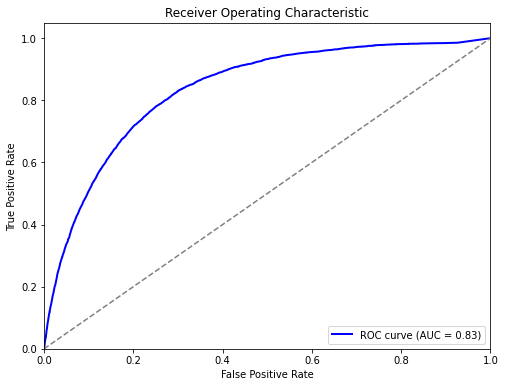

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probability scores for the positive class
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#### Create a Precision Recall Curve
##### Good for finding a balance between Precision and Recall
##### Focuses on finding the optimal threshold

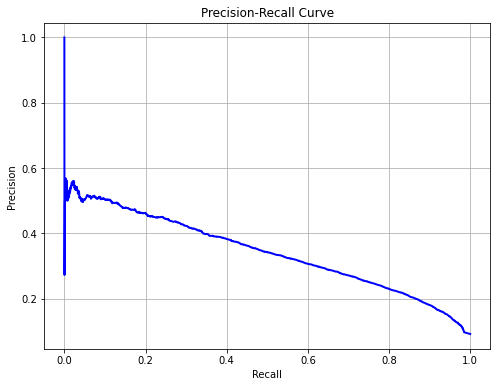

Optimal Threshold: 0.0


In [28]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

# Find the threshold that balances recall and precision
optimal_threshold_index = np.argmax(recall)
optimal_threshold = thresholds[optimal_threshold_index]
print("Optimal Threshold:", optimal_threshold)

##### Doing a couple checks to find out what the issue is with my precision-recall curve

In [29]:
# Perform basic checks to figure out what the issue is: Error found to be a class imbalance
missing_values = df.isnull().sum().sum()

# Ensure the threshold range covers 0 to 1
print("Minimum Threshold:", min(thresholds))
print("Maximum Threshold:", max(thresholds))

# Confirm the model's binary output
print("Unique Predictions:", np.unique(y_pred))
missing_values

Minimum Threshold: 0.0
Maximum Threshold: 1.0
Unique Predictions: [0 1]


0

##### Create a precision-recall curve that included a marker for optimal threshold
##### This is supposed to be a good balance between precision and recall while it can differ based on the context of a model

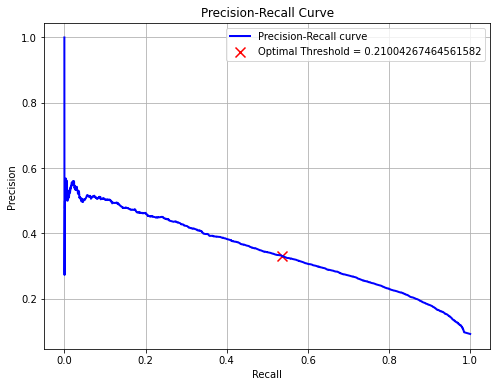

Optimal Threshold: 0.21004267464561582


In [30]:
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calculate F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the optimal threshold that maximizes the F1-score
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

# Highlight the optimal threshold point
plt.scatter(recall[np.argmax(f1_scores)], precision[np.argmax(f1_scores)], c='red', marker='x', s=100, label=f'Optimal Threshold = {optimal_threshold}')
plt.legend()

plt.grid()
plt.show()

print(f"Optimal Threshold: {optimal_threshold}")

##### For a little bit deeper of an analysis on the precision-recall curve we are going to take a look at the precision and recall at each chosen threshold to get an idea of how the data is taking it in

In [31]:
thresholds = np.arange(0, 1.01, 0.01)  # Create an array of thresholds from 0 to 1 in increments of 0.01

# Lists to store precision and recall values for each threshold
precision_values = []
recall_values = []

for threshold in thresholds:
    # Apply the threshold to probability scores to get binary predictions
    y_pred_binary = [1 if prob >= threshold else 0 for prob in y_prob]
    
    # Calculate precision and recall for the current threshold
    precision, recall, _ = precision_recall_curve(y_test, y_pred_binary)
    
    # Append precision and recall to their respective lists
    precision_values.append(precision[1])  # Precision for the positive class
    recall_values.append(recall[1])  # Recall for the positive class

# Now, precision_values and recall_values contain precision and recall for each threshold.
# You can analyze these values to find the optimal threshold for your specific goal.


Precision at Chosen Threshold: 0.2857142857142857
Recall at Chosen Threshold: 0.00028567347521782604


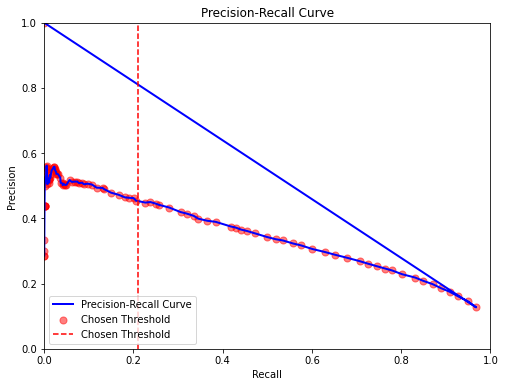

In [32]:
# Define chosen_threshold
chosen_threshold = optimal_threshold

# Find the index of the recall value that is closest to the chosen threshold
closest_recall_index = min(range(len(recall)), key=lambda i: abs(recall[i] - chosen_threshold))

# Retrieve the precision and recall at the closest index
precision_at_chosen_threshold = precision[closest_recall_index]
recall_at_chosen_threshold = recall[closest_recall_index]

# Print precision and recall at the chosen threshold
print("Precision at Chosen Threshold:", precision_at_chosen_threshold)
print("Recall at Chosen Threshold:", recall_at_chosen_threshold)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Highlight the chosen threshold
plt.scatter(recall_values, precision_values, c='red', s=50, marker='o', label='Chosen Threshold', alpha=0.5)
plt.axvline(x=chosen_threshold, color='red', linestyle='--', label='Chosen Threshold')

# Set plot limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Display legend
plt.legend(loc='lower left')

# Show the plot
plt.show()

##### Now we create a precision-recall curve without the actual visual interpretation but with the ability to manually change the threshold your focused on and it outputs the precision and recall at that point.

In [33]:
# Adjust the threshold to a new value
new_threshold = 0.7  # Replace with the desired threshold value

# Use the new threshold to make predictions
y_pred_adjusted = (y_prob >= new_threshold).astype(int)

# Calculate precision and recall at the new threshold
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)

print("Adjusted Precision:", precision_adjusted)
print("Adjusted Recall:", recall_adjusted)

Adjusted Precision: 0.5526315789473685
Adjusted Recall: 0.023996571918297387


##### Obviously something is wrong with the precision-recall curves as they are not looking like they are in the best shape and here we deem it to be a class imbalance and plot a visual to see how the imbalance is taking place

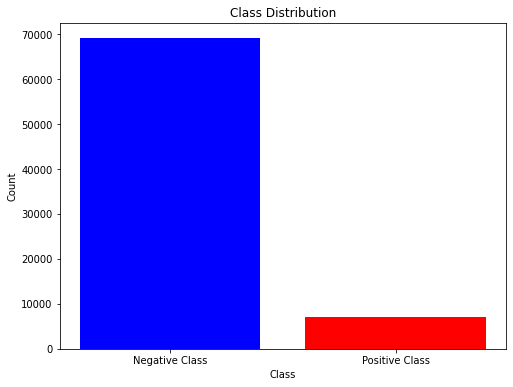

Positive Class Count: 7001
Negative Class Count: 69098
Percentage of Positive Class: 9.199858079606829 %


In [34]:
# Calculate the class distribution
positive_class_count = y_test.sum()
negative_class_count = len(y_test) - positive_class_count

# Create a bar chart to visualize the class distribution
class_distribution = [negative_class_count, positive_class_count]
class_labels = ['Negative Class', 'Positive Class']

plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_distribution, color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of the positive class in the test data
positive_class_percentage = (positive_class_count / len(y_test)) * 100

print("Positive Class Count:", positive_class_count)
print("Negative Class Count:", negative_class_count)
print("Percentage of Positive Class:", positive_class_percentage, "%")


## Resampling my data
### Initialize Third Random Forest Classifier
#### This should be using the best_params we found in hyperparameter tuning
#### We then evaluate the metrics
Currently there is a large class imbalance as shown above causing me issues with my precision-recall ratio and this needs to be dealt with to move on.

In [35]:
from sklearn.utils import shuffle

# Replace X_encoded and y with your encoded features and target variable
X_encoded_resampled = df[["Age", "GenHlth_4", "GenHlth_3", "Sex", "GenHlth_5", "HighChol", "HighBP", "Stroke", "Smoker", "GenHlth_2", "DiffWalk"]]
y_resampled = df['HeartDiseaseorAttack']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_resampled, y_resampled, test_size=0.3, random_state=42)

# Separate the positive and negative class examples
X_positive = X_train[y_train == 1]
X_negative = X_train[y_train == 0]

# Oversample the positive class to balance the dataset
oversampled_X_positive = X_positive.sample(len(X_negative), replace=True, random_state=42)

# Combine the oversampled positive class and the original negative class
X_train_resampled = pd.concat([oversampled_X_positive, X_negative])
y_train_resampled = np.concatenate([np.ones(len(oversampled_X_positive)), np.zeros(len(X_negative))])

# Shuffle the resampled data
X_train_resampled, y_train_resampled = shuffle(X_train_resampled, y_train_resampled, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(**best_params)  # You can adjust hyperparameters

# Fit the model to the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(confusion)

#IMPORTANT#
#Accuracy: The overall accuracy of the model improved.
#Precision: The proportion of true positive predictions among all positive predictions decreased. This means that more of the positive predictions are true positives, but it may also include some false positives.
#Recall: The recall increased substantially, meaning the model is better at identifying positive cases, which is essential in your case.
#F1-Score: The F1-score, which balances precision and recall, improved as well.

Accuracy: 0.742480190278453
Precision: 0.23297718985839058
Recall: 0.784887873160977
F1-Score: 0.3593029718507863
Confusion Matrix:
[[51007 18091]
 [ 1506  5495]]


### Create a Test Train Split Using the Resampled Data
### Initialize Fourth Random Forest Classifier
#### Use the best_parms from hyperparameter tuning once again
#### Wrap the new Random Forest Classifier in a Calibrated Classifier CV
This can be helpful for really making sure a model is giving fair results and truly taking into account the positive class

In [36]:
from sklearn.calibration import CalibratedClassifierCV

# Create a test train split with the resampled data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_train_resampled, y_train_resampled, test_size=0.3, random_state=42, stratify=y_train_resampled
)

# Create a Random Forest classifierS
rf_classifier_resampled = RandomForestClassifier(**best_params)

# Fit the model to the training data
rf_classifier_resampled.fit(X_train_resampled, y_train_resampled)

# Wrap base classifier with CalibratedClassifierCV
calibrated_classifier = CalibratedClassifierCV(rf_classifier_resampled, method='sigmoid', cv='prefit')

# Fit the calibrated model on your resampled training data
calibrated_classifier.fit(X_train_resampled, y_train_resampled)

# Use the trained model to predict on the resampled test data
y_pred_resampled = calibrated_classifier.predict(X_test_resampled)

# Now you have y_test_resampled and y_pred_resampled with the same number of samples
# You can calculate accuracy, precision, recall, F1, and confusion matrix
accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
precision_resampled = precision_score(y_test_resampled, y_pred_resampled)
recall_resampled = recall_score(y_test_resampled, y_pred_resampled)
f1_resampled = f1_score(y_test_resampled, y_pred_resampled)
confusion_resampled = confusion_matrix(y_test_resampled, y_pred_resampled)

print("Accuracy (Resampled):", accuracy_resampled)
print("Precision (Resampled):", precision_resampled)
print("Recall (Resampled):", recall_resampled)
print("F1-Score (Resampled):", f1_resampled)
print("Confusion Matrix (Resampled):")
print(confusion_resampled)

Accuracy (Resampled): 0.7792749338727244
Precision (Resampled): 0.7626787909536168
Recall (Resampled): 0.8108584706028795
F1-Score (Resampled): 0.7860310309807036
Confusion Matrix (Resampled):
[[36041 12162]
 [ 9117 39085]]


#### Create a ROC Curve (Resampled Data)
##### Checks for performance of the model by using roc_auc_score

ROC-AUC Score: 0.8572732944045423


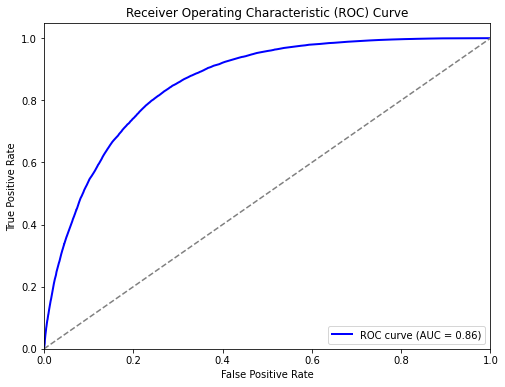

In [37]:
# Get probability scores for the positive class from the model
y_prob_resampled = calibrated_classifier.predict_proba(X_test_resampled)[:, 1]

# Calculate ROC curve
fpr_resampled, tpr_resampled, thresholds_resampled = roc_curve(y_test_resampled, y_prob_resampled)

# Calculate ROC-AUC score
roc_auc_resampled = roc_auc_score(y_test_resampled, y_prob_resampled)
print("ROC-AUC Score:", roc_auc_resampled)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_resampled, tpr_resampled, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_resampled)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Create a Precision Recall Curve
##### Good for finding a balance between Precision and Recall
##### Focuses on finding the optimal threshold

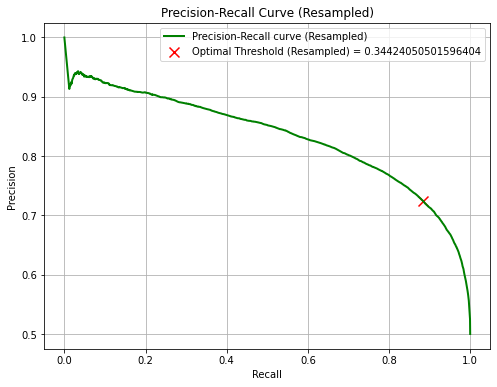

Optimal Threshold (Resampled): 0.34424050501596404


In [38]:
# Calculate precision-recall curve for resampled data
precision_resampled, recall_resampled, thresholds_resampled = precision_recall_curve(y_test_resampled, y_prob_resampled)

# Calculate F1-score for each threshold
f1_scores_resampled = 2 * (precision_resampled * recall_resampled) / (precision_resampled + recall_resampled)

# Find the optimal threshold that maximizes the F1-score for resampled data
optimal_threshold_resampled = thresholds_resampled[np.argmax(f1_scores_resampled)]

# Plot the precision-recall curve for resampled data
plt.figure(figsize=(8, 6))
plt.plot(recall_resampled, precision_resampled, color='green', lw=2, label='Precision-Recall curve (Resampled)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Resampled)')
plt.legend(loc='lower left')

# Highlight the optimal threshold point for resampled data
plt.scatter(recall_resampled[np.argmax(f1_scores_resampled)], precision_resampled[np.argmax(f1_scores_resampled)], c='red', marker='x', s=100, label=f'Optimal Threshold (Resampled) = {optimal_threshold_resampled}')
plt.legend()

plt.grid()
plt.show()

print(f"Optimal Threshold (Resampled): {optimal_threshold_resampled}")


##### For a little bit deeper of an analysis on the precision-recall curve we are going to take a look at the precision and recall at each chosen threshold to get an idea of how the data is taking it in

In [39]:
resampled_data_threshold = np.arange(0, 1.01, 0.01)  # Create an array of thresholds from 0 to 1 in increments of 0.01

# New variables for resampled data
resampled_precision_values = []
resampled_recall_values = []

for threshold in resampled_data_threshold:
    # Apply the threshold to probability scores to get binary predictions
    y_pred_binary_resampled = [1 if prob >= threshold else 0 for prob in y_prob_resampled]
    
    # Calculate precision and recall for the current threshold for resampled data
    precision_resampled, recall_resampled, _ = precision_recall_curve(y_test_resampled, y_pred_binary_resampled)
    
    # Append precision and recall to their respective lists for resampled data
    resampled_precision_values.append(precision_resampled[1])  # Precision for the positive class
    resampled_recall_values.append(recall_resampled[1])  # Recall for the positive class

Precision at Chosen Threshold (Resampled): 1.0
Recall at Chosen Threshold (Resampled): 0.0


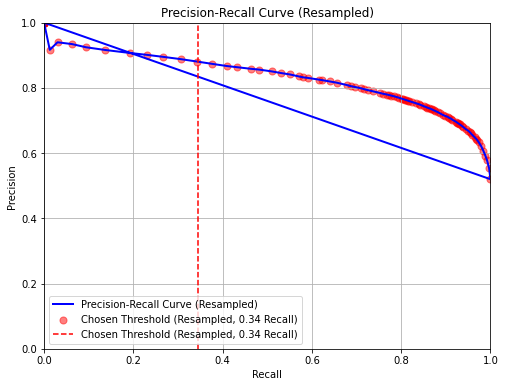

In [40]:
# Define chosen_threshold using the resampled optimal_threshold
chosen_threshold_resampled = optimal_threshold_resampled

# Find the index of the recall value that is closest to the chosen threshold for resampled data
closest_recall_resampled_index = min(range(len(recall_resampled)), key=lambda i: abs(recall_resampled[i] - chosen_threshold_resampled))

# Retrieve the precision and recall at the closest index
precision_at_chosen_threshold_resampled = precision_resampled[closest_recall_resampled_index]
recall_at_chosen_threshold_resampled = recall_resampled[closest_recall_resampled_index]

# Print precision and recall at the chosen threshold
print("Precision at Chosen Threshold (Resampled):", precision_at_chosen_threshold_resampled)
print("Recall at Chosen Threshold (Resampled):", recall_at_chosen_threshold_resampled)

# Plot the precision-recall curve for resampled data
plt.figure(figsize=(8, 6))
plt.plot(resampled_recall_values, resampled_precision_values, color='blue', lw=2, label='Precision-Recall Curve (Resampled)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Resampled)')

# Highlight the chosen threshold for resampled data
plt.scatter(resampled_recall_values, resampled_precision_values, c='red', s=50, marker='o', label=f'Chosen Threshold (Resampled, {chosen_threshold_resampled:.2f} Recall)', alpha=0.5)
plt.axvline(x=chosen_threshold_resampled, color='red', linestyle='--', label=f'Chosen Threshold (Resampled, {chosen_threshold_resampled:.2f} Recall)')

# Set plot limits for resampled data
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Display legend for resampled data
plt.legend(loc='lower left')

# Show the plot for resampled data with grid
plt.grid()
plt.show()

##### Now just as before when we plotted a barplot showing the distribution of positive and negative classes we will once again create this to make sure that our class imbalance has been fixed and everything is working correctly.

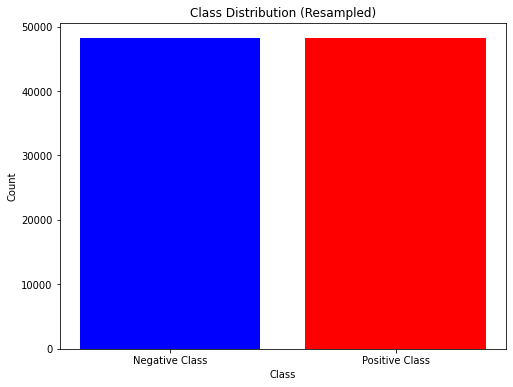

Positive Class Count (Resampled): 48202.0
Negative Class Count (Resampled): 48203.0
Percentage of Positive Class (Resampled): 49.99948135470152 %


In [41]:
# Calculate the class distribution for resampled data
positive_class_count_resampled = y_test_resampled.sum()
negative_class_count_resampled = len(y_test_resampled) - positive_class_count_resampled

# Create a bar chart to visualize the class distribution for resampled data
class_distribution_resampled = [negative_class_count_resampled, positive_class_count_resampled]
class_labels_resampled = ['Negative Class', 'Positive Class']

plt.figure(figsize=(8, 6))
plt.bar(class_labels_resampled, class_distribution_resampled, color=['blue', 'red'])
plt.title('Class Distribution (Resampled)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of the positive class in the test data for resampled data
positive_class_percentage_resampled = (positive_class_count_resampled / len(y_test_resampled)) * 100

print("Positive Class Count (Resampled):", positive_class_count_resampled)
print("Negative Class Count (Resampled):", negative_class_count_resampled)
print("Percentage of Positive Class (Resampled):", positive_class_percentage_resampled, "%")

##### Now we create a precision-recall curve with the actual visual interpretation but with the ability to manually change the threshold you are focused on and it outputs the precision and recall at that point.

In [42]:
# Setting up variables for next code block
y_true_resampled = y_test_resampled
y_prob_resampled = calibrated_classifier.predict_proba(X_test_resampled)[:, 1]

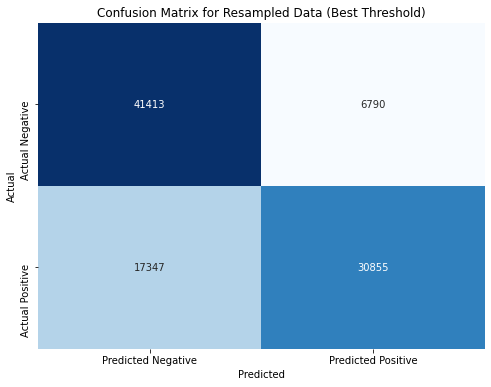

[[41413  6790]
 [17347 30855]]
Precision at Best Threshold: 0.8196307610572453
Recall at Best Threshold: 0.6401186672752168
F1-Score at Best Threshold: 0.7188370007105666


In [50]:
# Define your best threshold
best_threshold = 0.7  # Replace with your best threshold value

# Apply the threshold to make predictions
y_pred_resampled = (y_prob_resampled >= best_threshold).astype(int)

# Create the confusion matrix
confusion_mat_resampled = confusion_matrix(y_true_resampled, y_pred_resampled)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_resampled, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Resampled Data (Best Threshold)')
plt.show()

print(confusion_mat_resampled)

# Calculate precision at the best threshold
precision_resampled = precision_score(y_true_resampled, y_pred_resampled)

# Calculate recall at the best threshold
recall_resampled = recall_score(y_true_resampled, y_pred_resampled)

# Calculate recall at the best threshold
f1_resampled = f1_score(y_true_resampled, y_pred_resampled)

print("Precision at Best Threshold:", precision_resampled)
print("Recall at Best Threshold:", recall_resampled)
print("F1-Score at Best Threshold:", f1_resampled)


# WITH A THRESHOLD OF 0.4 #
#If we use our optimal threshold as calculated above which was 0.37 we will have our FN at 14920 which could endanger patients
# at the benefit of dropping those classified as FP to 6502 which are patients thought to have a risk of heart disease but 
# in actuality are not at risk


# WITH A THRESHOLD OF 0.7 # <----------------------- BEST BALANCE 
# If we are attempting to keep the costs a little lower than they could be while mitigating our FN (patients incorrectly
# categorized as not having heart disease) a threshold of 0.7 might be the best balance as we can keep a decent precision
# and recall while dropping FN to 6721 and FP to 17548.


# WITH A THRESHOLD OF 0.8 #
# Increasing our threshold by just 0.1 can drop our FN to 3672 but increase our FP to 25856. This can start to get pretty costly
# although it is good that we have lower cases of people believing they are not at risk of heart disease while they really are.
# We also notice our precision getting to be close to 86% and our recall dropping to around 46%.


# WITH A THRESHOLD OF 0.9 #
# Increasing our threshold by just 0.1 more can drop our FN to 377 and increase our FP to 43597. This is starting to get quite
# costly and we are noticing our TP value getting quite low so our model is struggling to correctly categorize people correctly
# as having heart disease. This is a big problem and also we notice our precision getting quite high and recall getting too low.

##### Create a calibration curve which calculates the Brier Score
###### The closer the score is to 0 the better as this shows how well calibrated the model is

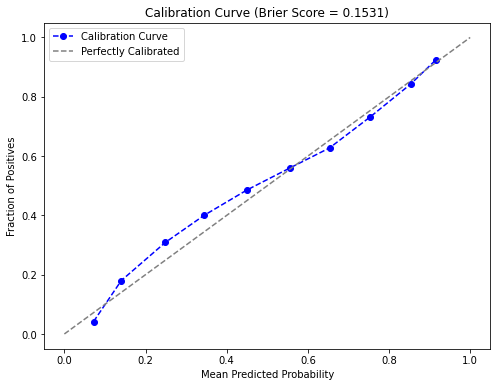

In [44]:
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

# Get the true probabilities and predicted probabilities (Using y_test_resampled rather than y_test as I want to focus on 
#the data with the fixed class imbalance)
true_prob, pred_prob = calibration_curve(y_test_resampled, y_prob_resampled, n_bins=10)

# Calculate the Brier score
brier = brier_score_loss(y_test_resampled, y_prob_resampled)

# Create the calibration plot
plt.figure(figsize=(8, 6))
plt.plot(pred_prob, true_prob, marker='o', linestyle='--', color='blue', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve (Brier Score = {:.4f})'.format(brier))
plt.legend(loc='upper left')
plt.show()